In [ ]:
!pip install yfinance

In [ ]:
!pip install --upgrade yfinance

In [1]:
# Option 1 for importing data, using yahoo API
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

sp500 = yf.download('^GSPC', start = '1920-01-17', end='2025-07-31')

sp500.to_csv('sp500.csv')

sp500df = pd.read_csv('sp500.csv', index_col='Price', parse_dates=True)
sp500df.tail()


C:\Users\Delyan\AppData\Local\Temp\ipykernel_24232\3427301594.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download('^GSPC', start = '1920-01-17', end='2025-07-31')
[*********************100%***********************]  1 of 1 completed
C:\Users\Delyan\AppData\Local\Temp\ipykernel_24232\3427301594.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500df = pd.read_csv('sp500.csv', index_col='Price', parse_dates=True)


,Close,High,Low,Open,Volume
Price,,,,,
2025-07-24,6363.35009765625,6381.31005859375,6360.56982421875,6368.60009765625,5282720000
2025-07-25,6388.64013671875,6395.81982421875,6368.52978515625,6370.009765625,4470720000
2025-07-28,6389.77001953125,6401.06982421875,6375.7900390625,6397.68994140625,4565620000
2025-07-29,6370.85986328125,6409.259765625,6363.919921875,6405.6201171875,5076120000
2025-07-30,6362.89990234375,6396.5400390625,6336.3798828125,6381.22998046875,5375070000


In [2]:
#Start after cleaning the csv file in excel
sp500df = pd.read_csv('sp500_clean.csv', parse_dates=True)
sp500df.head()

,Date,Close,High,Low,Open,Volume
0,1/2/1990,359.690002,359.690002,351.980011,353.399994,162070000
1,1/3/1990,358.760010,360.589996,357.890015,359.690002,192330000
2,1/4/1990,355.670013,358.760010,352.890015,358.760010,177000000
3,1/5/1990,352.200012,355.670013,351.350006,355.670013,158530000
4,1/8/1990,353.790008,354.239990,350.540008,352.200012,140110000


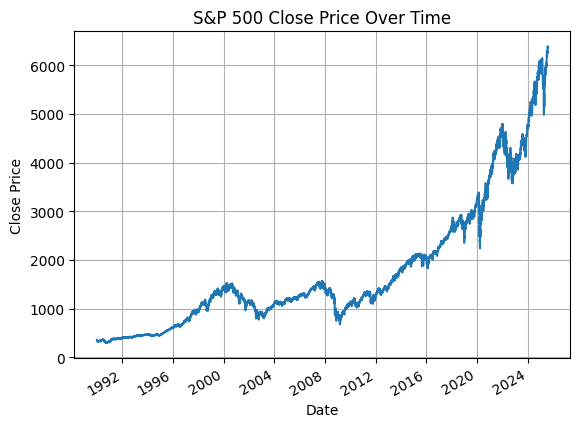

In [3]:
#A graph show
sp500df['Date'] = pd.to_datetime(sp500df['Date'])

# Set 'Date' as index
sp500df.set_index('Date', inplace=True)

# Convert 'Close' to numeric, in case it's still object type
sp500df['Close'] = pd.to_numeric(sp500df['Close'], errors='coerce')

sp500df['Close'].plot(title='S&P 500 Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

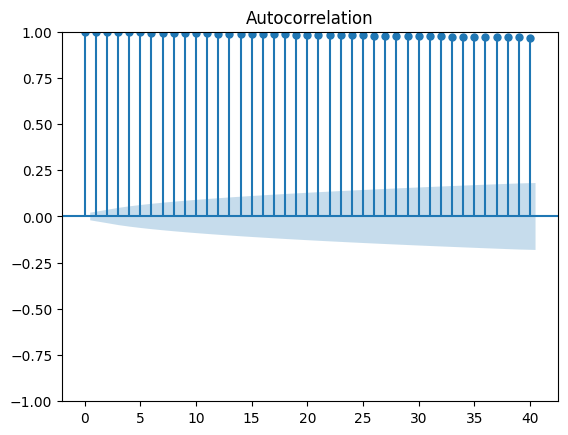

In [4]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
#**************************
# Plot ACF for 'Close' column
plot_acf(sp500df['Close'])
plt.show()


In [7]:
#This is incorporated in the final code (All working)
from pmdarima import auto_arima

# Automatically find the best ARIMA parameters
auto_model = auto_arima(
    train, 
    seasonal=False, 
    stepwise=True, 
    suppress_warnings=True,
    trace=True,      # shows the search process
    error_action='ignore'
)

print(auto_model.summary())

# Fit ARIMA with the best parameters
arima_model = ARIMA(train, order=auto_model.order)
arima_model_fit = arima_model.fit()

# Forecast
arima_forecast = arima_model_fit.forecast(steps=len(test))

C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ut

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3190.614, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3191.530, Time=0.06 sec


C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3191.656, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3188.614, Time=0.04 sec


C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3192.158, Time=0.29 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.947 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  288
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1593.307
Date:                Fri, 15 Aug 2025   AIC                           3188.614
Time:                        18:17:28   BIC                           3192.274
Sample:                    03-14-2024   HQIC                          3190.081
                         - 04-21-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3886.6782    113.646     34.200      0.000    3663.936 

NameError: name 'ARIMA' is not defined

Train: 2024-03-14 → 2025-04-21  (288 pts)
Test : 2025-04-22 → 2025-07-30   (72 pts)
ES choice on validation: multiplicative+damped


C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ut

Linear Regression (log+recent) -> MAE: 179.51, RMSE: 227.94
Exponential Smoothing (multiplicative+damped) -> MAE: 753.39, RMSE: 789.12
ARIMA (drift, m=21, max_d=1) -> MAE: 1019.80, RMSE: 1087.24


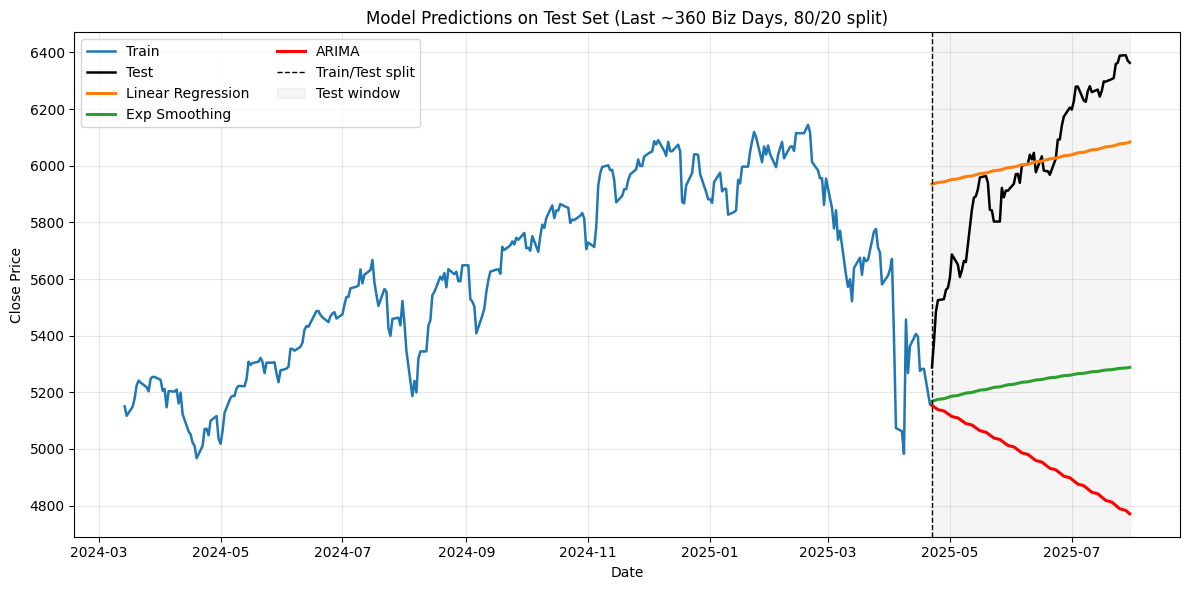

C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Delyan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ut

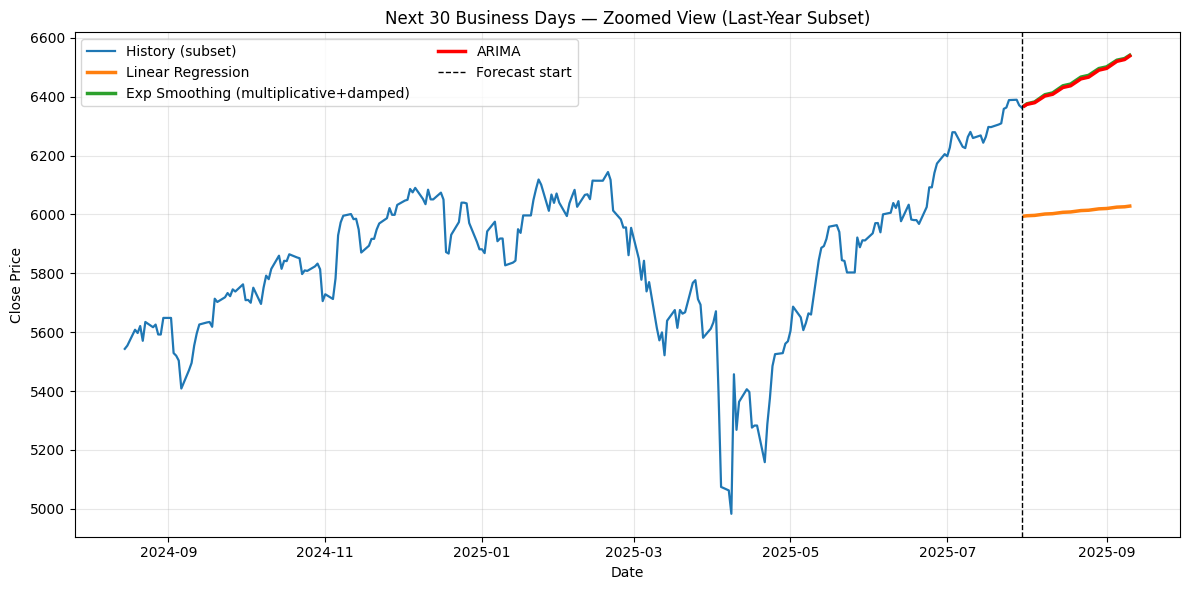

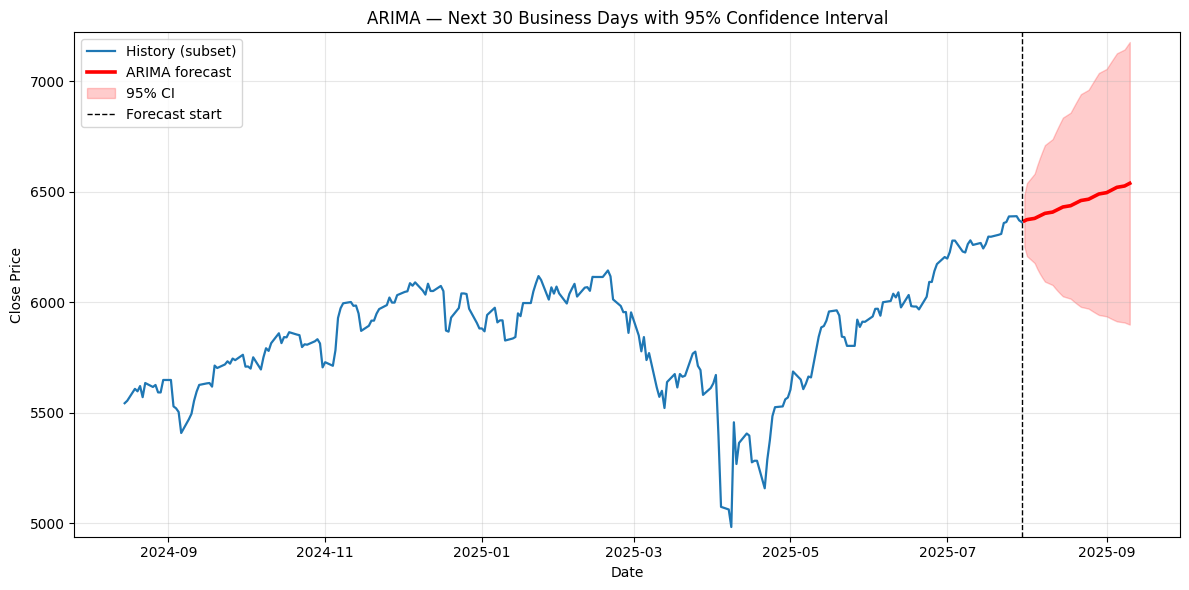

            LinearRegression_Forecast  ExpSmoothing_Forecast  ARIMA_Forecast  \
2025-07-31                5994.457027            6369.757550     6368.531343   
2025-08-01                5995.624566            6376.004255     6374.178426   
2025-08-04                5996.792333            6382.225806     6379.841153   
2025-08-05                5997.960327            6388.422275     6385.519522   
2025-08-06                5999.128548            6394.593733     6391.213534   
2025-08-07                6000.296997            6400.740251     6396.923189   
2025-08-08                6001.465674            6406.861899     6402.648487   
2025-08-11                6002.634578            6412.958751     6408.389428   
2025-08-12                6003.803709            6419.030876     6414.146012   
2025-08-13                6004.973069            6425.078348     6419.918239   
2025-08-14                6006.142656            6431.101236     6425.706108   
2025-08-15                6007.312471   

In [8]:
#All working
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pmdarima import auto_arima

# ==========================
# 0) Data prep (expects sp500df with DatetimeIndex + 'Close')
# ==========================
y = sp500df['Close'].asfreq('B').ffill()

# ==========================
# 1) Last ~360 business days, then 80/20 split. ****Note**** When doing it for the whole period, the prediction is barely visible
# ==========================
last_n = 360
y_recent = y.tail(last_n)

split_idx = int(len(y_recent) * 0.8)  # 80%
train = y_recent.iloc[:split_idx]
test  = y_recent.iloc[split_idx:]
split_date = test.index[0]

print(f"Train: {train.index[0].date()} → {train.index[-1].date()}  ({len(train)} pts)")
print(f"Test : {test.index[0].date()} → {test.index[-1].date()}   ({len(test)} pts)")

# ==========================
# 2) Fit on TRAIN -> predict TEST
# ==========================

# ---- Linear Regression (log + recent window inside TRAIN) ----
recent_n_lr = min(250, len(train))  # ~1Y of trading days
y_recent_train = train.tail(recent_n_lr)
X_train_lr = np.arange(len(y_recent_train)).reshape(-1, 1)
X_test_lr  = np.arange(len(y_recent_train), len(y_recent_train) + len(test)).reshape(-1, 1)

lr = LinearRegression().fit(X_train_lr, np.log(y_recent_train))
lin_pred = pd.Series(np.exp(lr.predict(X_test_lr)), index=test.index)

# ---- Exponential Smoothing (damped; choose add vs mult by validation) ----
es_add = ExponentialSmoothing(train, trend='add', damped_trend=True, seasonal=None).fit(optimized=True)
es_mul = ExponentialSmoothing(train, trend='mul', damped_trend=True, seasonal=None).fit(optimized=True)

es_add_pred = pd.Series(es_add.forecast(len(test)).values, index=test.index)
es_mul_pred = pd.Series(es_mul.forecast(len(test)).values, index=test.index)

# pick the better one on MAE, so it'll automatically choose the better
mae_add = mean_absolute_error(test, es_add_pred)
mae_mul = mean_absolute_error(test, es_mul_pred)
if mae_add <= mae_mul:
    es_fit = es_add
    es_pred = es_add_pred
    es_choice = "additive+damped"
else:
    es_fit = es_mul
    es_pred = es_mul_pred
    es_choice = "multiplicative+damped"
print(f"ES choice on validation: {es_choice}")

# ---- ARIMA (allow drift/time-trend, cap differencing, try monthly seasonality) ----
arima_model = auto_arima(
    train,
    seasonal=True, m=21,          # try short seasonality; set to False if you want no seasonality
    stepwise=True,
    suppress_warnings=True,
    error_action='ignore',
    max_d=1,                      # avoid overdifferencing (flat forecasts)
    trend='t',                    # time-trend (drift)
    information_criterion='aic'
)
arima_pred = pd.Series(arima_model.predict(n_periods=len(test)), index=test.index)

# ==========================
# 3) Evaluation on TEST
# ==========================
def evaluate(true, pred, name):
    mse = mean_squared_error(true, pred)
    mae = mean_absolute_error(true, pred)
    print(f"{name} -> MAE: {mae:.2f}, RMSE: {np.sqrt(mse):.2f}")

evaluate(test, lin_pred, "Linear Regression (log+recent)")
evaluate(test, es_pred,  f"Exponential Smoothing ({es_choice})")
evaluate(test, arima_pred, "ARIMA (drift, m=21, max_d=1)")

# --- Clear train/test plot with predictions ---
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train', linewidth=1.8)
plt.plot(test.index, test, label='Test', linewidth=1.8, color='black')

plt.plot(lin_pred.index, lin_pred, label='Linear Regression', linewidth=2.2)
plt.plot(es_pred.index, es_pred, label='Exp Smoothing', linewidth=2.2)
plt.plot(arima_pred.index, arima_pred, label='ARIMA', linewidth=2.2, color='red')

plt.axvline(split_date, linestyle='--', color='k', linewidth=1, label='Train/Test split')
plt.axvspan(split_date, test.index[-1], color='grey', alpha=0.08, label='Test window')

plt.title('Model Predictions on Test Set (Last ~360 Biz Days, 80/20 split)')
plt.xlabel('Date'); plt.ylabel('Close Price')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left', frameon=True, ncol=2)
plt.tight_layout()
plt.show()

# ==========================
# 4) Refit on FULL last-year subset -> forecast next 30 business days
# ==========================
forecast_horizon = 30
future_idx = pd.date_range(y_recent.index[-1] + pd.tseries.offsets.BDay(),
                           periods=forecast_horizon, freq='B')

# Linear Regression forecast (log + recent window)
y_recent_full = y_recent.tail(recent_n_lr)
X_full_lr   = np.arange(len(y_recent_full)).reshape(-1, 1)
X_future_lr = np.arange(len(y_recent_full), len(y_recent_full) + forecast_horizon).reshape(-1, 1)
lr = LinearRegression().fit(X_full_lr, np.log(y_recent_full))
lin_fc = pd.Series(np.exp(lr.predict(X_future_lr)), index=future_idx)

# Exponential Smoothing forecast (use the chosen type but refit on full subset)
if es_choice.startswith("add"):
    es_full_fit = ExponentialSmoothing(y_recent, trend='add', damped_trend=True, seasonal=None).fit(optimized=True)
else:
    es_full_fit = ExponentialSmoothing(y_recent, trend='mul', damped_trend=True, seasonal=None).fit(optimized=True)
es_fc = pd.Series(es_full_fit.forecast(steps=forecast_horizon).values, index=future_idx)

# ARIMA forecast + 95% Confidence intervals (same constraints; refit on full subset)
arima_full_model = auto_arima(
    y_recent,
    seasonal=True, m=21,
    stepwise=True,
    suppress_warnings=True,
    error_action='ignore',
    max_d=1,
    trend='t',
    information_criterion='aic'
)
arima_mean, arima_ci = arima_full_model.predict(
    n_periods=forecast_horizon, return_conf_int=True, alpha=0.05
)
arima_fc    = pd.Series(arima_mean, index=future_idx)
arima_lower = pd.Series(arima_ci[:, 0], index=future_idx)
arima_upper = pd.Series(arima_ci[:, 1], index=future_idx)

# ==========================
# 5) Plots
# ==========================

# (A) Optional combined zoomed forecast for context
hist_tail = y_recent.tail(250)
plt.figure(figsize=(12, 6))
plt.plot(hist_tail.index, hist_tail, label='History (subset)', linewidth=1.6)
plt.plot(lin_fc.index, lin_fc, label='Linear Regression', linewidth=2.5)
plt.plot(es_fc.index, es_fc, label=f'Exp Smoothing ({es_choice})', linewidth=2.5)
plt.plot(arima_fc.index, arima_fc, label='ARIMA', linewidth=2.5, color='red')
plt.axvline(y_recent.index[-1], color='k', linestyle='--', linewidth=1, label='Forecast start')
plt.title('Next 30 Business Days — Zoomed View (Last-Year Subset)')
plt.xlabel('Date'); plt.ylabel('Close Price')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left', ncol=2, frameon=True)
plt.tight_layout()
plt.show()

# (B) ARIMA-only with 95% confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(hist_tail.index, hist_tail, label='History (subset)', linewidth=1.6)
plt.plot(arima_fc.index, arima_fc, label='ARIMA forecast', linewidth=2.6, color='red')
plt.fill_between(arima_fc.index, arima_lower, arima_upper, alpha=0.2, label='95% CI', color='red')
plt.axvline(y_recent.index[-1], color='k', linestyle='--', linewidth=1, label='Forecast start')

ymin = pd.concat([hist_tail, arima_lower, arima_upper]).min()
ymax = pd.concat([hist_tail, arima_lower, arima_upper]).max()
pad = 0.02 * (ymax - ymin)
plt.ylim(ymin - pad, ymax + pad)

plt.title('ARIMA — Next 30 Business Days with 95% Confidence Interval')
plt.xlabel('Date'); plt.ylabel('Close Price')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left', frameon=True)
plt.tight_layout()
plt.show()

# ==========================
# 6) Forecast table
# ==========================
forecast_df = pd.DataFrame({
    'LinearRegression_Forecast': lin_fc,
    'ExpSmoothing_Forecast': es_fc,
    'ARIMA_Forecast': arima_fc,
    'ARIMA_Lower95': arima_lower,
    'ARIMA_Upper95': arima_upper
})
print(forecast_df)